In [3]:
# VIZUALIZATION OF BEST PARAMETERS
import queue
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv('results/proper_combinations_results.csv', delimiter=',')
df_sorted = df.sort_values(by='avg_solution_cost', ascending=False)
best_solution = df_sorted.iloc[0]

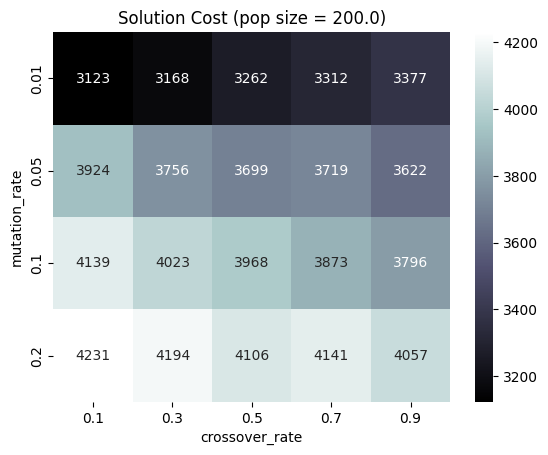

In [17]:
# TEST1: HEATMAP FOR BEST POPULATION SIZE
best_population_size = best_solution['population_size']
subset = df[df['population_size'] == best_population_size]

heatmap_data = subset.pivot_table(
    index='mutation_rate', 
    columns='crossover_rate', 
    values='avg_solution_cost'
)

sns.heatmap(heatmap_data, 
            annot=True, 
            cmap='bone',
            fmt='.0f')
plt.title(f'Solution Cost (pop size = {best_population_size})')
plt.show()

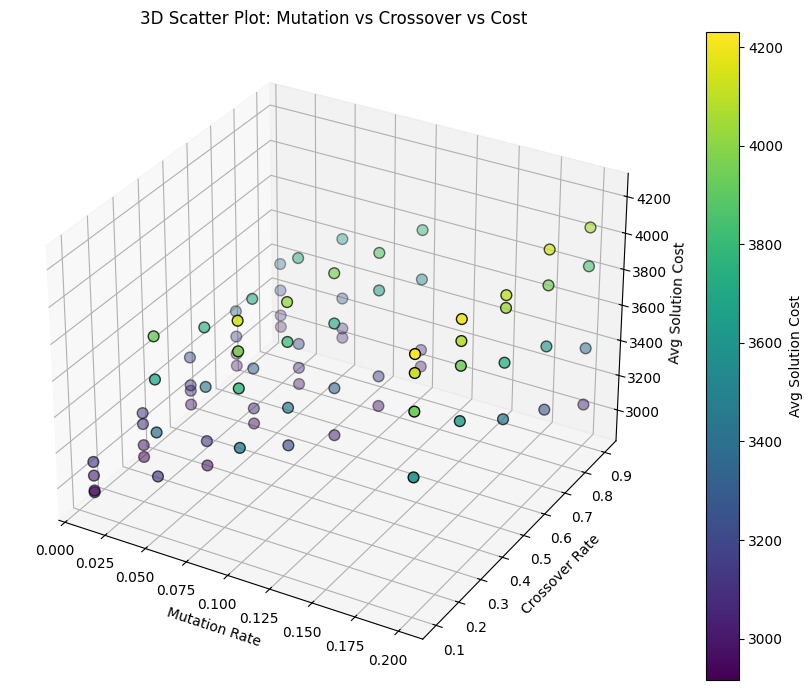

In [24]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
sc = ax.scatter(
    df['mutation_rate'], 
    df['crossover_rate'], 
    df['avg_solution_cost'], 
    c=df['avg_solution_cost'], 
    cmap='viridis', 
    s=60, 
    edgecolor='k'
)

# Axis labels
ax.set_xlabel('Mutation Rate')
ax.set_ylabel('Crossover Rate')
ax.set_zlabel('Avg Solution Cost')
ax.set_title('3D Scatter Plot: Mutation vs Crossover vs Cost')

# Color bar
plt.colorbar(sc, ax=ax, label='Avg Solution Cost')

plt.tight_layout()
plt.show()